In [14]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pylab as pl
get_ipython().magic(u'matplotlib inline')

In [15]:
data= pd.read_csv('../iteration_results.csv', header=None)

In [16]:
data = data[1:]
cols = ['index', 'index_2','res_people', 'commercial_people', 'metric', 'in_build_pump', 'treat', 'treat_emb', 'piping']
data.columns = cols

In [24]:
len(data)

84

In [29]:
data = data[1:20]

In [30]:
data['total_people'] = data['res_people'] + data['commercial_people'] 

In [31]:
data['people_sum'] = data.total_people.cumsum()

(array([ 10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.]),
 <a list of 8 Text yticklabel objects>)

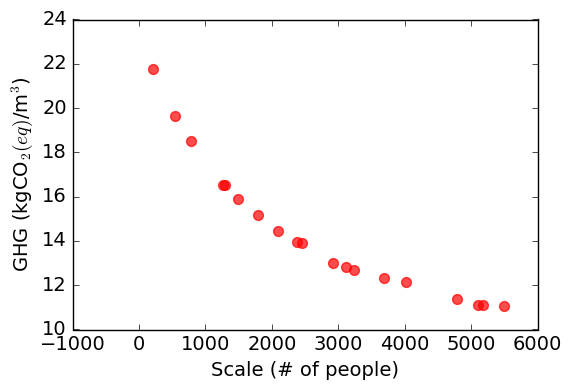

In [32]:
plt.scatter(data['people_sum'], data['metric'], color = 'r', alpha=0.7, s=50)
plt.xlabel('Scale (# of people)',fontsize =14)
plt.ylabel('GHG (kgCO$_2(eq)$/m$^3$)',fontsize =14)
#plt.ylim(3,8)
#plt.xlim(-50,500)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)

In [21]:
data_plot = data[['in_build_pump', 'treat', 'treat_emb', 'piping']]

In [22]:
data_plot.columns = [['pumping', 'treatment operation', 'treatment capital', 'piping']]

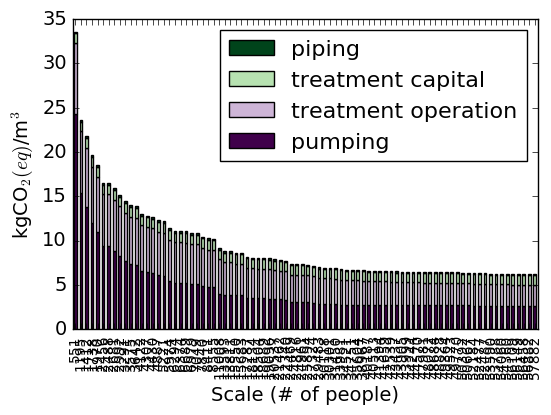

In [23]:
ax = data_plot.plot(kind='bar', stacked = True, colormap='PRGn', legend=True)
plt.xlabel('Scale (# of people)',fontsize =14)
plt.xticks(np.arange(len(data_plot)), map(int, data['people_sum']))
plt.ylabel('kgCO$_2(eq)$/m$^3$',fontsize =14)
#plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right', fontsize=16)

In [ ]:
data_infra = data[['people_sum','in_build_pump','piping']]
data_infra['total_infra'] = data_infra['in_build_pump'] + data_infra['piping'] 

In [ ]:
plt.scatter(data_infra['people_sum'], data_infra['total_infra'], color = 'r', alpha=0.7, s=50)
plt.xlabel('Scale (# of people)')
plt.ylabel('Energy ($kWh/m^3$)')